<a href="https://colab.research.google.com/github/SOWMIYA-AB/student_scores_project/blob/main/Student_Scores_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import files
uploaded = files.upload()   # click "Choose Files" and select student_scores.csv


Saving student_scores.csv to student_scores (1).csv


In [25]:
import pandas as pd
import matplotlib.pyplot as plt


In [26]:
df = pd.read_csv('student_scores.csv')


In [27]:
df.head()


,Hours_Studied,Exam_Score
0,5.94,21.17
1,7.44,46.95
2,6.42,29.55
3,5.90,27.31
4,4.81,17.79


In [28]:
print("Shape:", df.shape)     # how many rows and columns
print("\nColumns:", df.columns.tolist())  # names of columns
df.info()                     # data types and missing values


Shape: (50, 2)

Columns: ['Hours_Studied', 'Exam_Score']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Hours_Studied  50 non-null     float64
 1   Exam_Score     50 non-null     float64
dtypes: float64(2)
memory usage: 932.0 bytes


In [29]:
df.describe()


,Hours_Studied,Exam_Score
count,50.00000,50.000000
mean,5.84120,28.343400
std,2.47562,12.836373
min,1.17000,1.500000
25%,4.31500,18.635000
50%,6.11500,29.730000
75%,7.83750,38.097500
max,9.81000,48.790000


In [30]:
df.columns.tolist()


['Hours_Studied', 'Exam_Score']

In [31]:
# Diagnostic + robust filter for "score > 80"
import pandas as pd

print("1) Columns in the DataFrame:")
print(df.columns.tolist())
print("\n2) A preview of the first 5 rows:")
display(df.head())

# Try to find a likely numeric score column automatically
candidates = [c for c in df.columns if 'score' in c.lower() or 'marks' in c.lower() or 'total' in c.lower()]
print("\n3) Candidate columns (score/marks/total):", candidates)

# If no obvious candidate, also show first column names with their types
if not candidates:
    print("\nNo obvious 'score/marks/total' column found. Showing column types:")
    for c in df.columns:
        print(f" - {c} (dtype: {df[c].dtype})  sample values: {df[c].dropna().astype(str).head(3).tolist()}")

# Choose the best column to use
col = None
if candidates:
    col = candidates[0]         # pick first likely candidate
else:
    # fallback: pick the first numeric-looking column
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
    if numeric_cols:
        col = numeric_cols[0]

if col is None:
    raise Exception("No suitable numeric column found for filtering. Check column names and types. Use df.columns.tolist() to inspect.")

print(f"\n4) Using column: '{col}' for filtering. dtype = {df[col].dtype}")

# Ensure values are numeric (coerce non-numeric to NaN)
df[col + '_numeric'] = pd.to_numeric(df[col], errors='coerce')

print("\n5) After coercion, sample values and NaN count:")
print(df[[col, col + '_numeric']].head())
print("NaNs in numeric column:", df[col + '_numeric'].isna().sum())

# Now filter for > 80 (change threshold if you need)
threshold = 80
filtered = df[df[col + '_numeric'] > threshold].reset_index(drop=True)

print(f"\n6) Number of rows with {col} > {threshold}:", filtered.shape[0])
display(filtered.head(20))   # show up to first 20 matches

# Optional: save filtered results for download
filtered.to_csv('high_scorers.csv', index=False)
print("\nSaved filtered results to 'high_scorers.csv' (you can download if needed).")


1) Columns in the DataFrame:
['Hours_Studied', 'Exam_Score']

2) A preview of the first 5 rows:


,Hours_Studied,Exam_Score
0,5.94,21.17
1,7.44,46.95
2,6.42,29.55
3,5.90,27.31
4,4.81,17.79



3) Candidate columns (score/marks/total): ['Exam_Score']

4) Using column: 'Exam_Score' for filtering. dtype = float64

5) After coercion, sample values and NaN count:
   Exam_Score  Exam_Score_numeric
0       21.17               21.17
1       46.95               46.95
2       29.55               29.55
3       27.31               27.31
4       17.79               17.79
NaNs in numeric column: 0

6) Number of rows with Exam_Score > 80: 0


,Hours_Studied,Exam_Score,Exam_Score_numeric



Saved filtered results to 'high_scorers.csv' (you can download if needed).


In [32]:
df.columns.tolist()


['Hours_Studied', 'Exam_Score', 'Exam_Score_numeric']

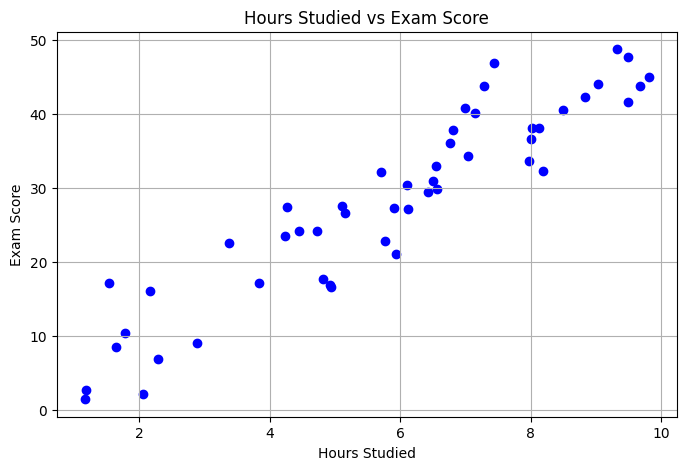

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df['Hours_Studied'], df['Exam_Score_numeric'], color='blue')
plt.title('Hours Studied vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()


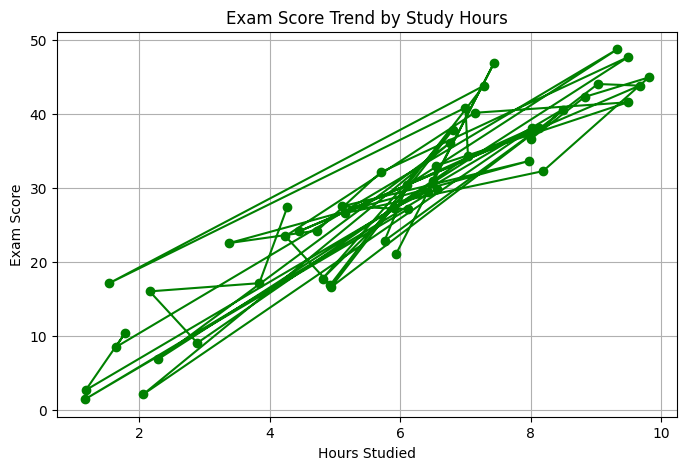

In [34]:
plt.figure(figsize=(8,5))
plt.plot(df['Hours_Studied'], df['Exam_Score_numeric'], marker='o', color='green')
plt.title('Exam Score Trend by Study Hours')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()
